In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(images,targets), (_, _) = fashion_mnist.load_data()


images = images[0: 1000]
targets = targets[0: 1000]

images = images.reshape(-1, 784)
images = images.astype(float)

scaller = StandardScaler()
images = scaller.fit_transform(images)


images_train, images_test, targets_train, targets_test = train_test_split(images, targets, test_size=0.2, random_state=1)

print(images_train.shape, targets_train.shape)

(800, 784) (800,)


In [3]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal","Shirt","Sneaker","Bag","Ankle boot"]


In [4]:
# plt.imshow(images[2], cmap="binary")
# plt.title(targets_names[targets[2]])
# plt.show()

In [5]:
from tensorflow import keras
model = tf.keras.models.Sequential()
"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    # keras.layers.Dense(256, activation='relu')
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
"""

#model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

model.add(tf.keras.layers.Dense(784, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# model_output = model.predict(images[0])

In [6]:
model.build(images_train.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (800, 784)                615440    
_________________________________________________________________
dense_1 (Dense)              (800, 128)                100480    
_________________________________________________________________
dense_2 (Dense)              (800, 10)                 1290      
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [8]:
print(images_train.shape, targets_train.shape)
history = model.fit(images_train, targets_train, epochs=10, validation_split=0.2)

(800, 784) (800,)
Epoch 1/10
20/20 [==============================] - 1s 37ms/step - loss: 2.0886 - accuracy: 0.2933 - val_loss: 1.1483 - val_accuracy: 0.6438
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 1.0456 - accuracy: 0.7202 - val_loss: 0.9653 - val_accuracy: 0.6625
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.7717 - accuracy: 0.7760 - val_loss: 0.9000 - val_accuracy: 0.6750
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.7802 - val_loss: 0.8572 - val_accuracy: 0.7000
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5305 - accuracy: 0.8526 - val_loss: 0.8165 - val_accuracy: 0.7000
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.8618 - val_loss: 0.7909 - val_accuracy: 0.7000
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.8857 - val_loss: 0.7687 - val_accuracy: 0.7000
E

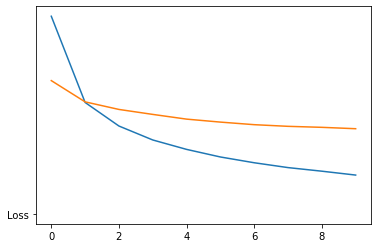

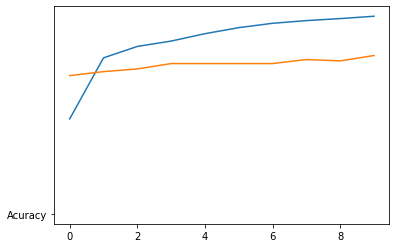

In [9]:
loss_curve = history.history['loss']
acc_curve = history.history['accuracy']
                      
loss_val_curve = history.history['val_loss']
acc_val_curve = history.history['val_accuracy']

plt.plot(loss_curve, label='train')
plt.plot(loss_val_curve, label='validation')
plt.plot('Loss')
plt.show()

plt.plot(acc_curve, label='train')
plt.plot(acc_val_curve, label='validation')
plt.plot('Acuracy')
plt.show()


In [10]:
model.save('../models/simple_nn.h5')